In [1]:
import os
import spacy
from collections import Counter
import matplotlib.pyplot as plt

In [2]:
# corpora_m

In [3]:
# Männer
# Verzeichnis, in dem sich die .txt-Dateien befinden
directory = 'Text/männlich'

# Variable, um den gesamten Inhalt der Dateien zu speichern
corpora_m = ''

# Durchlaufe alle Dateien im angegebenen Verzeichnis
for filename in os.listdir(directory):
    # Prüfe, ob die Datei eine .txt-Datei ist
    if filename.endswith('.txt'):
        file_path = os.path.join(directory, filename)
        # Öffne die Datei und lese ihren Inhalt
        with open(file_path, 'r', encoding='utf-8') as file:
            corpora_m += file.read() + '\n'

In [4]:
# corpora_w

In [5]:
# Frauen
# Verzeichnis, in dem sich die .txt-Dateien befinden
directory = 'Text/weiblich'

# Variable, um den gesamten Inhalt der Dateien zu speichern
corpora_w = ''

# Durchlaufe alle Dateien im angegebenen Verzeichnis
for filename in os.listdir(directory):
    # Prüfe, ob die Datei eine .txt-Datei ist
    if filename.endswith('.txt'):
        file_path = os.path.join(directory, filename)
        # Öffne die Datei und lese ihren Inhalt
        with open(file_path, 'r', encoding='utf-8') as file:
            corpora_w += file.read() + '\n'

In [6]:
# Laden des deutschen Sprachmodells
nlp = spacy.load("de_core_news_sm")

In [7]:
# Verarbeiten des Textes mit spaCy
doc_m = nlp(corpora_m)
doc_w = nlp(corpora_w)

In [8]:
# Zählen der Gesamtzahl der Wörter für Männer und Frauen
total_words_m = len(doc_m)
total_words_w = len(doc_w)

In [9]:
# Zählen der verschiedenen Wortarten
pos_counts_m = Counter(token.pos_ for token in doc_m)
pos_counts_w = Counter(token.pos_ for token in doc_w)

# Sortieren der Wortarten nach Häufigkeit absteigend
sorted_pos_counts_m = pos_counts_m.most_common()
sorted_pos_counts_w = pos_counts_w.most_common()

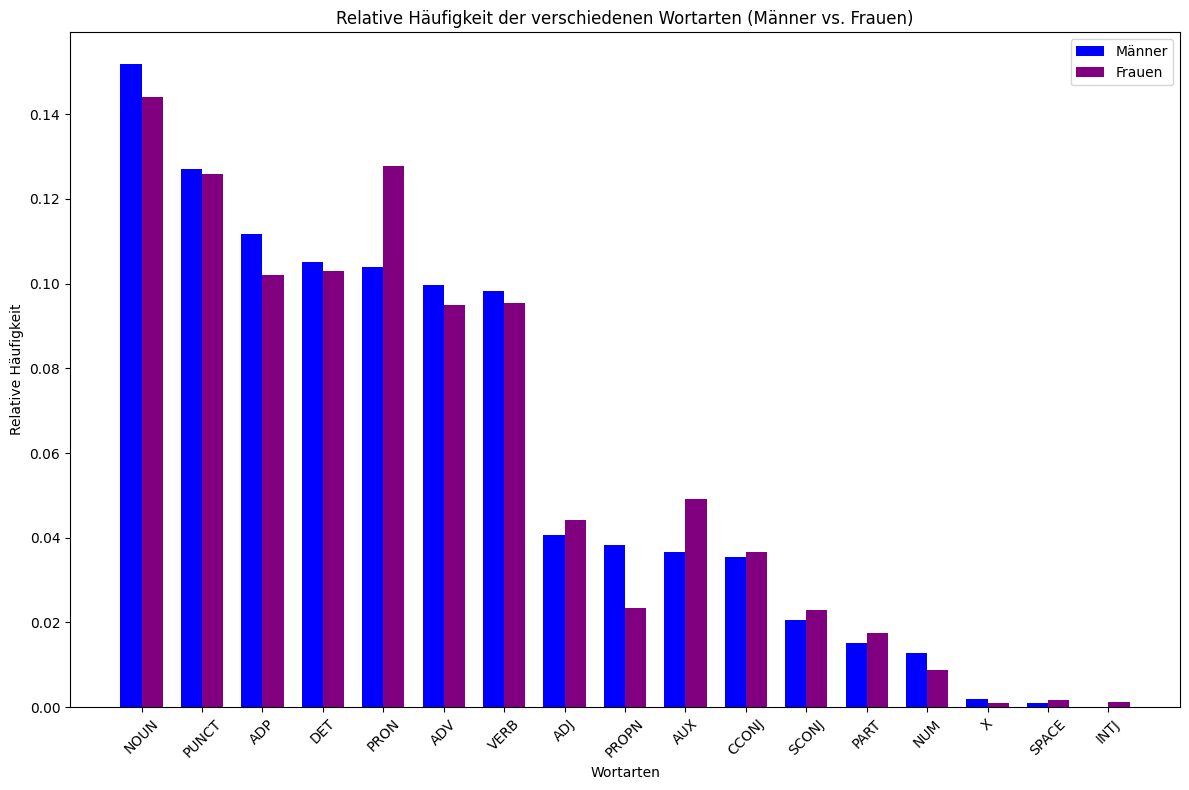

<Figure size 640x480 with 0 Axes>

In [11]:
# Erstellen eines kombinierten Balkendiagramms der relativen Häufigkeiten
# Bestimmen aller einzigartigen POS-Tags
all_pos_tags = set(pos_counts_m.keys()).union(set(pos_counts_w.keys()))

# Erstellen der Daten für das Diagramm
m_relative_freqs = [pos_counts_m.get(tag, 0) / total_words_m for tag in all_pos_tags]
w_relative_freqs = [pos_counts_w.get(tag, 0) / total_words_w for tag in all_pos_tags]

# Sortieren nach den allgemeinen Häufigkeiten
sorted_indices = sorted(range(len(all_pos_tags)), key=lambda i: m_relative_freqs[i], reverse=True)
sorted_pos_tags = [list(all_pos_tags)[i] for i in sorted_indices]
sorted_m_relative_freqs = [m_relative_freqs[i] for i in sorted_indices]
sorted_w_relative_freqs = [w_relative_freqs[i] for i in sorted_indices]

# Erstellen des Balkendiagramms
plt.figure(figsize=(12, 8))
bar_width = 0.35
index = range(len(sorted_pos_tags))

plt.bar(index, sorted_m_relative_freqs, bar_width, label='Männer', color='blue')
plt.bar([i + bar_width for i in index], sorted_w_relative_freqs, bar_width, label='Frauen', color='purple')

plt.xlabel('Wortarten')
plt.ylabel('Relative Häufigkeit')
plt.title('Relative Häufigkeit der verschiedenen Wortarten (Männer vs. Frauen)')
plt.xticks([i + bar_width / 2 for i in index], sorted_pos_tags, rotation=45)
plt.legend()

plt.tight_layout()
plt.show()

# Gafik als png speichern
plt.savefig('Output/POS.png')